In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
#Loading MNIST

In [3]:
(X_train,Y_train), (X_test, Y_test)=mnist.load_data()

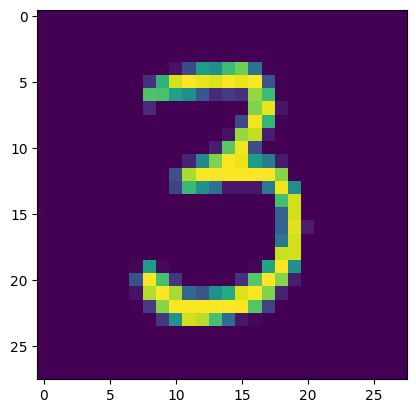

In [4]:
 plt.imshow(X_train[50])

In [5]:
#unique values in y train

In [6]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
#Scaling the values

In [8]:
X_train=X_train/255

In [9]:
X_test=X_test/255

In [10]:
#Building Neural Network

In [11]:
#Settting up layers
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])

In [16]:
#compiling the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#training the network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2941 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9705
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0644 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0556 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9846
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0429 - accuracy: 0.9864
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9869
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

In [19]:
loss, accuracy=model.evaluate(X_train,Y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9923


In [20]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [22]:
#converting the probablity for all
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
confuision_mat=confusion_matrix(Y_test,Y_pred_labels)

In [24]:
print(confuision_mat)

tf.Tensor(
[[ 966    0    2    1    1    1    4    1    3    1]
 [   0 1125    3    1    0    1    2    0    3    0]
 [   2    1 1009    2    3    2    0    2   10    1]
 [   0    0    4  978    0   11    0    7    6    4]
 [   1    0    6    0  961    1    2    4    0    7]
 [   2    0    0    6    1  865    6    2    8    2]
 [   4    1    1    1    6    9  931    0    5    0]
 [   0    4   11    1    5    0    0  994    5    8]
 [   0    0    3    9    6    7    1    1  944    3]
 [   0    2    0    4    8    7    2    8    3  975]], shape=(10, 10), dtype=int32)
